# A template for ML project lifecycle

In [1]:
# Often various pre-written Python packages need to be imported into the project 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# The dataset "tips" was taken from UCI repository, however 
# the value of soem cells were purposely changed to be cleard in the project
# you will find the modified "tips.csv" in your course shell.
# Load the dataset. Cells with content “NULL”, “?”, or “NONE” or just blank space will be interpreted as np.NAN
# May open the dataset in Excel to examine the content. 

df=pd.read_csv("tips.csv", na_values=['NULL', '?', 'NONE'])

# Explore Data

In [3]:
# 244 observations and 7 features
df.shape   # shape is an attribute of a pandas dataframe

(244, 7)

In [4]:
df.head(5)  # can also ckeck the end of the list: df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3
2,21.01,NaN,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Obtain the column names
# You may also try 
df.columns   # columns is an attributes of a dataframe, other attributes are index, size, ndim, dtype

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
# List categorical features  ( these are none numeric features)
df.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [7]:
# List non catagorical (numeric) features along with their statistical description.
# Try to learn aboutthe features by observing their statistical characteristics.  
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()  # May try without transpose() function

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.79,8.90,3.07,13.35,17.80,24.13,50.81
tip,240.0,2.97,1.41,0.00,2.00,2.86,3.56,10.00
size,244.0,2.57,0.95,1.00,2.00,2.00,3.00,6.00


<AxesSubplot:>

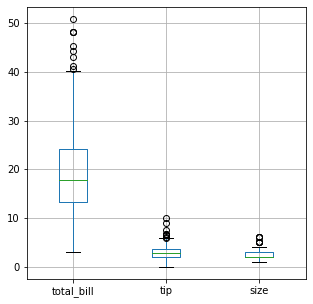

In [8]:
# Can generate boxplot for each numeric feature. Identify the quartile values and outliers. Try to verify the output
# of the bocplot with descriptive stat. results obtained earlier.
df.boxplot(['total_bill', 'tip', 'size'], figsize=(5, 5))

In [9]:
# Find the 25 and 75 percentiles for a given feature
q1, q3 = np.percentile(df['total_bill'],[25, 75])
print(q1.round(decimals=2), q3.round(decimals=2))

13.35 24.13


In [10]:
# find the interquartile range and the cutoffs for the outliers

IQR = q3 - q1
lowerOutliers= q1 - 1.5*IQR   # anything below this value is considered an outlier
upperOutliers= q3 + 1.5*IQR   # anything above this value is considered an outlier
print(lowerOutliers, upperOutliers)

-2.8224999999999945 40.29749999999999


array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

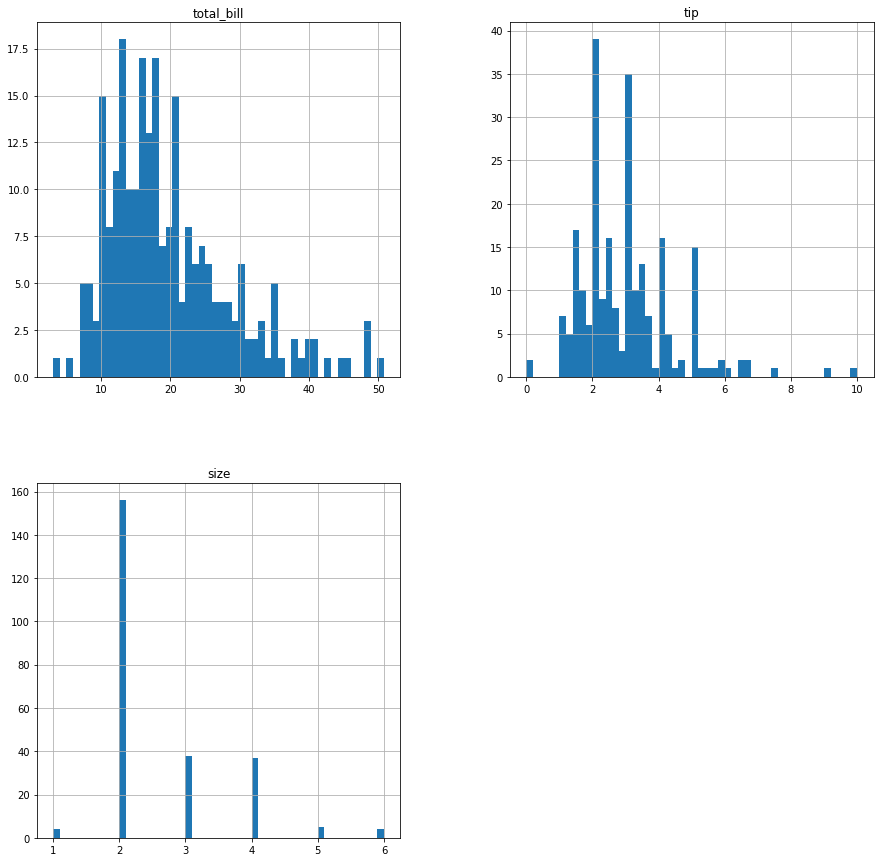

In [11]:
# Histogram with specified number of bins. This provides view of a spread and concentration of data points
# may waht to change the number of bins to see the effects.
df.hist(bins=50, figsize=(15, 15)) # df.hist(['total_bill'],bins=50, figsize=(15, 15))

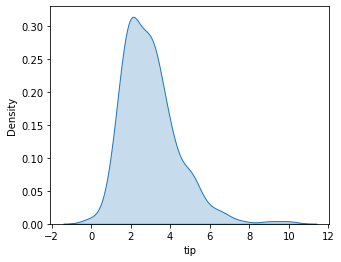

In [12]:
plt.figure(figsize=(5, 4))
sns.kdeplot(df.tip, shade=True)  # plot the probability density function
plt.show()

In [13]:
# A quick way to get data types and non-null values.
# identify the number of columns haveing missing values. 
# For example, "smoker" feature has 4 missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         240 non-null    float64
 2   sex         243 non-null    object 
 3   smoker      240 non-null    object 
 4   day         242 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [14]:
# in case we need to find the row numbers or the location of the null value.
np.where(df['smoker'].isnull())

(array([12, 20, 44, 51], dtype=int64),)

In [15]:
# check the value of the "smoker" feature at indices 12, 20, 44, and 51 to verify "NAN"
df.iloc[[12, 20, 44, 51]]

,total_bill,tip,sex,smoker,day,time,size
12,15.42,1.57,Male,NaN,Sun,Dinner,2
20,17.92,4.08,Male,NaN,Sat,Dinner,2
44,30.40,5.60,Male,NaN,Sun,Dinner,4
51,10.29,2.60,Female,NaN,Sun,Dinner,2


In [16]:
# let's explore categorical features
# number of values in the "day" categorical feature
df['day'].value_counts()

Sat     87
Sun     76
Thur    61
Fri     18
Name: day, dtype: int64

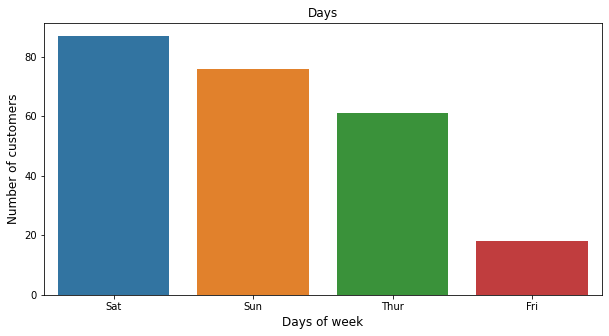

In [17]:
# Display the frequency of each unique value in a categorical feature 
op_count = df['day'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index,y= op_count.values)
plt.title('Days')
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Days of week', fontsize=12)
plt.show()

In [18]:
# Let's continue to examine the categorical features. We can get the number of unique values and the count for
# the top values using the describe function 
# We also get the count of non-null values.
df.select_dtypes(include=['object']).describe().transpose() 

,count,unique,top,freq
sex,243,3,Male,155
smoker,240,2,No,147
day,242,4,Sat,87
time,244,2,Dinner,176


In [19]:
# Get a listing of the unique values in each category
cat=df.select_dtypes('object').columns
for x in cat:
    print('{} = {}'.format(x, df[x].unique()))

sex = ['Female' nan 'Male' 'M']
smoker = ['No' nan 'Yes']
day = ['Sun' 'Sat' 'Thur' 'Fri' nan]
time = ['Dinner' 'Lunch']


# Data clearning and Transformation

In [20]:
# Note the inconsistent values 'Male' and 'M', and, of course, the "NAN" in feature "sex". 
# let's replace 'M' with "Male" to ensure uniformity of values
df['sex'].replace({'M':"Male"}, inplace=True)
for x in cat:
    print('{} = {}'.format(x, df[x].unique()))

sex = ['Female' nan 'Male']
smoker = ['No' nan 'Yes']
day = ['Sun' 'Sat' 'Thur' 'Fri' nan]
time = ['Dinner' 'Lunch']


In [21]:
# dislay dataframe to verify the change.
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3
2,21.01,NaN,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
# The number of unique values in each feature. 
df.nunique()

total_bill    229
tip           122
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [23]:
# list columns in a decreasing order of number of missing values.
# The to_string() is used to display all the rows.
print(df.isnull().sum().sort_values(ascending=False).to_string())

tip           4
smoker        4
day           2
sex           1
total_bill    0
time          0
size          0


In [24]:
# Start filling for the missing values
# For "tip" feature, we are going to compute the mean of the tip feature for all the customers in the same gender 
# We use the groupby() function for this purpose. Notice the change is inplace
df['tip'].fillna(df.groupby("sex")["tip"].transform('mean'), inplace = True) 

In [25]:
df['day'].fillna(df['day'].mode()[0],inplace=True)  # fill day with the mode
print(df.isnull().sum().sort_values(ascending=False).to_string()) # varify the change
df['day']

smoker        4
sex           1
total_bill    0
tip           0
day           0
time          0
size          0


0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: object

In [26]:
# use fill-forward method ffill() to fill missing values for 'smoker' feature
df.loc[:,'smoker'] = df.loc[:,'smoker'].ffill()
print(df.isnull().sum().sort_values(ascending=False).to_string())

sex           1
total_bill    0
tip           0
smoker        0
day           0
time          0
size          0


In [27]:
# We can also drop the 'smoker' column if not needed. For example
df.drop(['smoker'], axis=1)   

,total_bill,tip,sex,day,time,size
0,16.99,1.010000,Female,Sun,Dinner,2
1,10.34,1.660000,NaN,Sun,Dinner,3
2,21.01,3.079412,Male,Sun,Dinner,3
3,23.68,3.310000,Male,Sun,Dinner,2
4,24.59,3.610000,Female,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.920000,Male,Sat,Dinner,3
240,27.18,2.000000,Female,Sat,Dinner,2
241,22.67,2.000000,Male,Sat,Dinner,2
242,17.82,1.750000,Male,Sat,Dinner,2


In [28]:
# Use fill-forward method ffill() to fill missing values for 'sex' feature
df.loc[:,'sex'] = df.loc[:,'sex'].ffill()
print(df.isnull().sum().sort_values(ascending=False).to_string())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0


In [29]:
# All missing values have been taken care of
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Text(0.5, 1.0, 'distribution of tip')

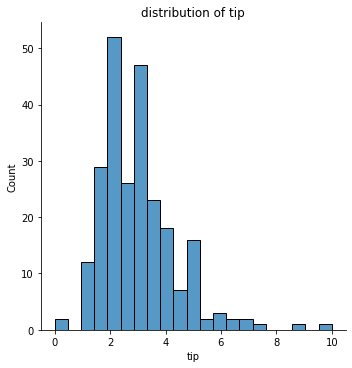

In [30]:
# In our first model we plan to predcit the amount of tip given by customers. So, we look closer at the "tip" feature.
# The plot of the distribution is skewed to the right a bit. Ideally we want normal distribution for features  
# in linear regression modeling. 
sns.displot(df['tip'])
plt.title('distribution of tip')

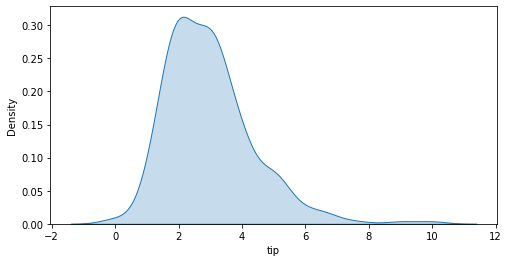

In [31]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df.tip, shade=True)
plt.show()

In [32]:
# examine the statistical values of the tip feature 
df.tip.describe()

count    244.000000
mean       2.973885
std        1.401331
min        0.000000
25%        2.000000
50%        2.900000
75%        3.520000
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:>

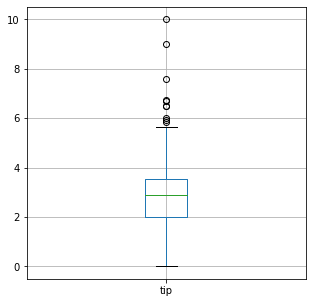

In [33]:
# examine the outliers
df.boxplot(['tip'], figsize=(5,5))

In [34]:
# Clean the outliers
# Identify values greater than max + 1.5* Inetrquartile range and  less that min - 1.5* interquartile range
# This should be done to all features
for x in ['tip']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = df['tip'].mean()   # df.dropna(axis=0)
    df.loc[df[x] > max,x] = df['tip'].mean()
print(df.isnull().sum().sort_values(ascending=False).to_string())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0


Handle Text and Categorical Attributes.

    A common approach to dealing with textual data is to create one binary attribute for each category of the feature. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors.
    If the attribute has two states like female/male, then sklean provides the LabelEncoder, which can be used.Pandas     get_dummies API can also be used for transforming one or more categorical features into dummy numerical features.  
    This is one of the most preferred way of one-hot-encoding due to simplicity of the method / API usage.    

In [35]:

df = pd.concat([df, pd.get_dummies(df[['time','day']])], axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.010000,Female,No,Sun,Dinner,2,1,0,0,0,1,0
1,10.34,1.660000,Female,No,Sun,Dinner,3,1,0,0,0,1,0
2,21.01,3.079412,Male,No,Sun,Dinner,3,1,0,0,0,1,0
3,23.68,3.310000,Male,No,Sun,Dinner,2,1,0,0,0,1,0
4,24.59,3.610000,Female,No,Sun,Dinner,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,2.973885,Male,No,Sat,Dinner,3,1,0,0,1,0,0
240,27.18,2.000000,Female,Yes,Sat,Dinner,2,1,0,0,1,0,0
241,22.67,2.000000,Male,Yes,Sat,Dinner,2,1,0,0,1,0,0
242,17.82,1.750000,Male,No,Sat,Dinner,2,1,0,0,1,0,0


# Feature Selection

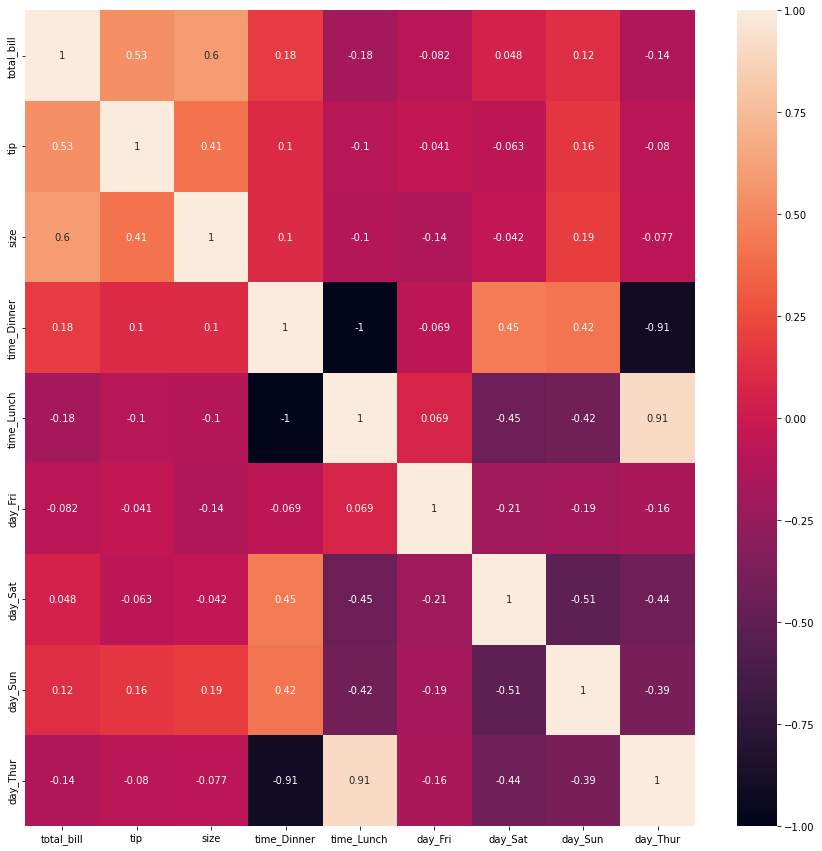

In [36]:
# We will use the correlation matrix and heatmap for feature selection
corr=df.corr()
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

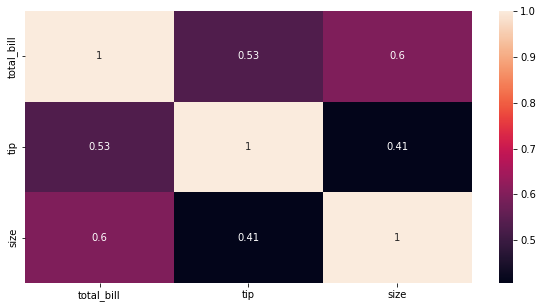

In [37]:
# Only focus on features with correlation factor above 0.4
top_feature = corr.index[corr['tip']>0.4]
plt.subplots(figsize=(10, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)

In [38]:
# identify top features highly correlated to the target "tip"
print("Most postively correlated features with the target")
corr.sort_values(['tip'], ascending=False, inplace=True)
corr.tip

Most postively correlated features with the target


tip            1.000000
total_bill     0.531848
size           0.406833
day_Sun        0.163978
time_Dinner    0.100572
day_Fri       -0.041276
day_Sat       -0.063193
day_Thur      -0.080204
time_Lunch    -0.100572
Name: tip, dtype: float64

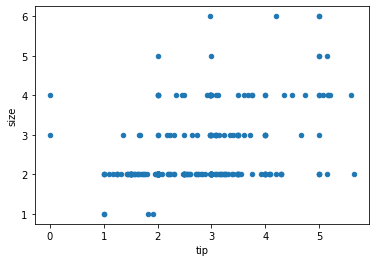

In [39]:
# check relationship between tip and size
df.plot(kind='scatter',x='tip',y='size')
plt.show()

<AxesSubplot:>

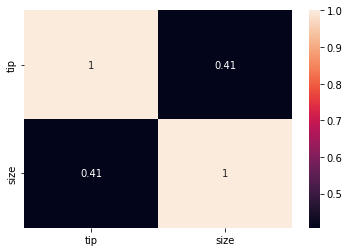

In [40]:
corr2=df[['tip','size']].corr()
sns.heatmap(corr2, annot=True)

# Model Training : Linear Regression - used for predictions
<b>Predict taget feature "tip" from the variable "total_bill".</b>

Sometimes data that we have is quite simple such that the output value of the dataset is just the linear combination of features in the input example.
In case of one feature X, plot data points on a graph with an X-axis and a Y-axis and then find the line  
 $$ 𝑦=𝑎𝑥+𝑏 $$   that best fits the points, i.e. find the model’s  parameters a and b.
Once our machine learning model has learned the line of best fit via linear regression, this line can then be used to predict values for new or unseen data points.
<img src = "linear.png">

RMSE is the Root of the Mean of the Square of Errors:  $$ RMSE= {\sqrt{\sum_{i=1}^{n} (y - y_i)^2}\over {n}}. $$
RMSE gives the standard deviation of the residuals (prediction errors).

MAE is the Mean of Absolute (Average) of Errors: $$ MAE={{\sum_{i=1}^{n}|(y-y_i)|} \over {n}}. $$

R-Squared score: R-Squared value is always between 0 and 1. A R-squared value of 0.98 indicates that 98% of the predictions are correct. 
$$ 𝑅 𝑆𝑞𝑢𝑎𝑟𝑒𝑑 𝑠𝑐𝑜𝑟𝑒= 1-{\sum_{i=1}^{n} (y_i -y_p)^2 \over \sum_{i=1}^{n} (y_i -\bar{y_i})^2}. $$
Where, $𝑦_𝑖$ is the actual value, $𝑦_𝑝$ is the predicated value and $\bar{y_i} $ is the average of the actual values.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # definition given later in the notes
from sklearn.metrics import mean_absolute_error  
from sklearn.metrics import r2_score 

In [42]:
# let's examine the cleaned/transformed dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.010000,Female,No,Sun,Dinner,2,1,0,0,0,1,0
1,10.34,1.660000,Female,No,Sun,Dinner,3,1,0,0,0,1,0
2,21.01,3.079412,Male,No,Sun,Dinner,3,1,0,0,0,1,0
3,23.68,3.310000,Male,No,Sun,Dinner,2,1,0,0,0,1,0
4,24.59,3.610000,Female,No,Sun,Dinner,4,1,0,0,0,1,0


In [43]:
# Select features X = total_bill and target Y= tip
# there are different ways to select features from the data set, here we use iloc function of the dataframe, which
# returns an array. Later we also show another approach where the return type will be a dataframe

X = df.iloc[:,0:1].values   # X is an array type: Array of arrays[[][][]..[]] must apply .ravel() to turn to an array [...]
Y = df.iloc[:,1:2].values   # Y is all rows and column 1 "tip"


In [44]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [45]:
# create the model and fit data 
linreg= LinearRegression()
linreg.fit(X_train,y_train) #linear regression model

LinearRegression()

In [46]:
# Make predictions to the X_test set and compare with the given labels in Y_test
y_pred = linreg.predict(X_test)
# create a dataframe to display the result.
resultframe= pd.DataFrame({"y_test": y_test.ravel(), "Y-pred": y_pred.ravel()}) # must use ravel() function
resultframe.head(10)

,y_test,Y-pred
0,3.000000,2.798395
1,2.180000,3.027325
2,3.310000,3.085574
3,3.000000,4.228192
4,2.000000,2.462451
5,1.500000,2.047261
6,3.250000,3.022584
7,2.973885,3.155337
8,2.310000,2.273482
9,2.500000,2.331053


In [47]:
mse_loss = mean_squared_error(y_test, y_pred)
print('MSE loss = ',mse_loss)

MSE loss =  0.5334937844083354


In [48]:
# y = ax + b  , here b = linreg.Intercept and a = linreg.coef
print(linreg.coef_, linreg.intercept_)

[[0.06773078]] [1.48170889]


Redo the same problem, but use dataframe to store the features and the target.

In [49]:
X1=df[['total_bill']]   # this is a dataframe not an array, unlike the previous example
# X1 can also be defined this way:
#X1 = df.drop(columns = ['sex', 'smoker', 'day', 'time', 'size', 'tip', ...])  # X will be of  daraframe type
y1 = df[['tip']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=7)
linreg.fit(X1_train,y1_train) #linear regression model
y1_pred = linreg.predict(X1_test)
resultframe1 = pd.DataFrame({'pred':y1_pred.ravel()})
y1_test.reset_index(drop=True, inplace=True)
resultframe1['test']=y1_test
resultframe1.head(10)
# The error analysis will be the same as above 

,pred,test
0,2.798395,3.000000
1,3.027325,2.180000
2,3.085574,3.310000
3,4.228192,3.000000
4,2.462451,2.000000
5,2.047261,1.500000
6,3.022584,3.250000
7,3.155337,2.973885
8,2.273482,2.310000
9,2.331053,2.500000


# Linear Logistic Regression - used for classification
<b>Predict the target value "sex" feature from the "tip" and "total_bill" amount. This is a classification problem.</b>

Logistic regression has the same main idea as linear regression. 
The output, which is the dependent variable is binary, meaning the outcome can have only two possible values

In logistic regression, the line of best fit is transformed using a non-linear S-shaped function called the logistic function p(x(k)), with outcome values ranging from 0 to 1. These 0 to 1 values can then be interpreted as the probability of occurrence of 𝑦(k) .

𝑝(x(k))is the probability that the corresponding 𝑦(k)will be unity and 1 - p(x(k))  is the probability that it will be zero.
$$p(x_{k})={{1} \over {1 + e^{ax_{k}+b}}}$$

In [50]:
# A use of map to convert catagorical values to numeric 
df['sex'] = df['sex'].map({'Male': 0,'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0,'Yes': 1})
df

,total_bill,tip,sex,smoker,day,time,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.010000,1,0,Sun,Dinner,2,1,0,0,0,1,0
1,10.34,1.660000,1,0,Sun,Dinner,3,1,0,0,0,1,0
2,21.01,3.079412,0,0,Sun,Dinner,3,1,0,0,0,1,0
3,23.68,3.310000,0,0,Sun,Dinner,2,1,0,0,0,1,0
4,24.59,3.610000,1,0,Sun,Dinner,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,2.973885,0,0,Sat,Dinner,3,1,0,0,1,0,0
240,27.18,2.000000,1,1,Sat,Dinner,2,1,0,0,1,0,0
241,22.67,2.000000,0,1,Sat,Dinner,2,1,0,0,1,0,0
242,17.82,1.750000,0,0,Sat,Dinner,2,1,0,0,1,0,0


<AxesSubplot:>

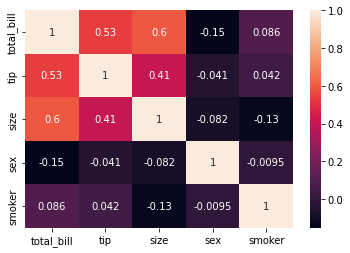

In [51]:
# "total_bill", "tip" and customer "sex" are note well correlated, but this is an example to show regression.
cor3 = df[['total_bill','tip','size','sex', 'smoker']].corr()
sns.heatmap(cor3, annot=True)

In [52]:
# Select features X = total_bill and tip and target Y= sex
# X = np.asarray(df.drop(columns = ['sex', 'smoker', 'day_Fri',..., 'time_Dinner', 'size']))
# Y = np.asarray(df['sex'])
X = df.iloc[:,[0, 1]].values
Y = df.iloc[:,2:3].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [54]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train.ravel()) # ravel to flatten data
#threshold = 0.1
y_pred = logreg.predict(X_test)

In [55]:
# Make predictions to the test set and compare with the label.
df2 = pd.DataFrame(y_pred, columns = ['y-pred'])
result= pd.concat([df2, pd.DataFrame(y_test,columns=['label'])], axis = 1 )
result.head(10)

,y-pred,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,1
7,0,0
8,0,0
9,0,0


In [56]:
logreg.predict_proba(X_test)[:,1]

array([0.36950262, 0.32095525, 0.34173099, 0.21262114, 0.38621909,
       0.42709821, 0.34793913, 0.3250445 , 0.41910843, 0.41664648,
       0.24911763, 0.42062137, 0.37090648, 0.26557356, 0.40421455,
       0.3810564 , 0.38615345, 0.35124675, 0.2904607 , 0.38702699,
       0.35820388, 0.42502978, 0.41557633, 0.42504482, 0.36482241,
       0.36766358, 0.37403085, 0.22401952, 0.40138726, 0.44149083,
       0.34159096, 0.39987386, 0.31128365, 0.39065527, 0.41351649,
       0.36790812, 0.38031163, 0.38930809, 0.4019057 , 0.42277933,
       0.40484247, 0.41195503, 0.27756026, 0.42020832, 0.41014885,
       0.16830876, 0.39774279, 0.31781126, 0.41203689])

In [57]:
#score gives the accuracy
score = logreg.score(X_test, y_test)  # uses the R-squared formula for regression = Accuracy formula
print(score)

0.6530612244897959


In [58]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[32  0]
 [17  0]]


<img src="cm.PNG">

In [59]:
print(classification_report(y_test, y_pred, target_names=['Male','Female']))
#print(classification_report(y_test, y_pred, labels=[1,0]))  , may add more target_names or labels

              precision    recall  f1-score   support

        Male       0.65      1.00      0.79        32
      Female       0.00      0.00      0.00        17

    accuracy                           0.65        49
   macro avg       0.33      0.50      0.40        49
weighted avg       0.43      0.65      0.52        49



C:\Users\amf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

<img src="cm2.PNG">

In [60]:
print(logreg.coef_, logreg.intercept_)

[[-0.03670518  0.11093978]] [-0.15362171]


# Decision Tree
<b>Predict the target value "sex" feature from the "tip" and "total_bill" amount. This is a classification problem.</b>

Decision Trees also belong to the category of supervised learning algorithms, but they can be used for solving both regression and classification tasks.
The training model learns to predict values of the target variable by learning decision rules with a tree representation. 
A tree is made up of nodes corresponding to features or attribute.
The final nodes, leaf nodes, correspond to label's predicted value.
There are various ways to obtain the decision tree from the data. We will discuss the CART method, that uses the GINI index as the metric or the cost function  to evaluate  the split in feature selection.

<img src="DecisionTree.png">

In [61]:
# Fitting Decision Tree classifier to the Training set
# Create your Decision Tree classifier object here.
from sklearn.tree import DecisionTreeClassifier
# criterion parameter can be entropy or gini. 
dtree = DecisionTreeClassifier(criterion='gini',random_state=0) 
dtree.fit(X_train,y_train)
#6 Predicting the Test set results
y_pred = dtree.predict(X_test)

In [62]:
# Predictions to the test set and compare with the label.
df2 = pd.DataFrame(y_pred, columns = ['y-pred'])
vertical_concat = pd.concat([df2, pd.DataFrame(y_test,columns=['label'])], axis = 1 )
vertical_concat.head(10)

,y-pred,label
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,1
6,0,1
7,0,0
8,1,0
9,1,0


In [63]:
# Use score and confusion matrix for error anaysis
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[18 14]
 [12  5]]


In [64]:
score = dtree.score(X_test, y_test)
print(score)

0.46938775510204084


# Random Forest 
<b>Predict the target value "sex" feature from the "tip" and "total_bill" amount. This is a classification problem.</b>

Random Forest is an ensemble of decision trees. The vote of decision trees are combined to make a final decision; majority vote wins. 
Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem.
Random Forest works on classification and Regression.
Random Forest uses N number of Decision Tree as base model and give some random sample of the data to each Decision Tree to predict.Random Forest take every output of Decision Trees and do voting, whichever class has highest voting it take that as  the output.

<img src="RandomForest.png">

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (max_depth=10, random_state=0, n_estimators=100)

#Train the model using the training sets 
rfc.fit(X_train,y_train.ravel())
y_pred=rfc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)


[[21 11]
 [15  2]]


In [66]:
score = rfc.score(X_test, y_test)
print(score)

0.46938775510204084


# K Nearest Neighbor (KNN) 
<b>Predict the target value "sex" feature from the "tip" and "total_bill" amount. This is a classification problem.</b>

The algorithm classifies an unknown item by looking at k of its, already classified, nearest neighbor items by finding out majority votes from nearest neighbors that have similar attributes as those used to map the items.
<img src="knn.png">
The distance functions for assessing similarity between instances can be Euclidean, Manhattan, or Minkowski distance. 
<img src="distance.png">

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn5.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[21 11]
 [15  2]]


<img src="cm.PNG">

<img src="cm2.PNG">

In [69]:
score = knn5.score(X_test, y_test)
print(score)

0.4489795918367347


# Support Vector Machine (SVM)
<b>Predict the target value "sex" feature from the "tip" and "total_bill" amount. This is a classification problem.</b>

A supervised algorithm for classification problems. It plots each data item as a point in n-dimensional space, where n is the number of input features. SVM finds an optimal boundary, called a hyperplane, that best separates the possible outputs by their class label. The task of the SVM algorithm is to find the coefficients that provide the best separation of classes by this hyperplane. The distance between the hyperplane and the closest class point is called the margin. The optimal hyperplane is one that has the largest margin that classifies points in such a way that the distance between the closest data point from both classes is maximum.

<img src="SVM1.png">

The Support Vector Machine(SVM) as a classifier can conveniently perform tasks for both linearly separable and non-linearly separable data points, using kernel functions
<img src="SVM2.png">
Widely used kernel functions: (1) Linear function kernel, (2) Polynomial function kernel, (3) Radial Basis Function kernel (RBF), which could be either Gaussian or Laplace. This is dependent on a hyperparameter known as gamma, (4) The Sigmoid Function that finds more application in neural networks as an activation function. This function is used in image 
<img src="SVM3.png">

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)  # also try kernal 'rbf'
svm.fit(X_train, y_train.ravel())

SVC(kernel='linear', random_state=0)

In [71]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[21 11]
 [15  2]]


In [72]:
score = svm.score(X_test, y_test)
print(score)

0.6530612244897959


# Naive Bayes
<b>Predict the target value "sex" feature from the "tip" and "total_bill" amount. This is a classification problem.</b>

This is based on the Bayes Theorem. It is called naive because the classifier assumes that the input variables are
independent of each other.
$$ (1) \hspace{1cm} P(A \cap B)={P(A|B) \times P(B)}$$ similarly $$   (2)  \hspace{1cm} P(A \cap B)={P(B|A) \times P(A)}$$.
Now, by setting equations (1) and (2) equal we can get the Bayes theorem which is given by the formula:
$$P(A|B) ={{P(B|A) \times P(A)} \over {P(B)}} $$

See slides for additional informaion on Naive Bayes Algorithm.

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.ravel())

In [73]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[21 11]
 [15  2]]


In [74]:
score = nb.score(X_test, y_test)
print(score)

NameError: name 'nb' is not defined

# XGBOOST
<b>Predict the target value "sex" feature from the "tip" and "total_bill" amount. This is a classification problem.</b>

XGBoost is a data science library for performing classification and regression. 
XGBoost makes use of  gradient boosted decision tree, which provides better performance than regular decision trees.
Gradient boosting  combines many decision trees into a single model for classification or regression. 
Gradient boosting starts off with a single decision tree and iteratively adds more decision trees to the overall model to correct the model's errors on the training dataset.
XGBoot has its own APIs, different from Scikit-Learn. However, for simplicity it provides an API wrapper for Scikit-Learn user called XGBClassifier. 


In [ ]:
import xgboost as xgb
xg= xgb.XGBClassifier(objective='binary:logistic', eval_metric='mlogloss', use_label_encoder=False)
xg.fit(X_train, y_train.ravel())

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
score = xg.score(X_test, y_test)
print(score)

In [ ]:
# After training an XGBoost model, we can view the relative (proportional) importance of each dataset feature
# using the feature_importances_ property of the model.

print('Feature importances:\n{}'.format(
  repr(xg.feature_importances_)))

In [ ]:
# We can plot the feature importances for a model using the plot_importance function.
xgb.plot_importance(xg)
plt.show() # matplotlib plot

The resulting plot is a bar graph of the F-scores ( F1-scores) for each feature (the number next to each bar is the exact F-score). Note that the features are labeled as "fN", where N is the index of the column in the dataset. The F-score is a standardized measurement of a feature's importance, based on the specified importance metric.

By default, the plot_importance function uses feature weight as the importance metric, i.e. how often the feature appears in the boosted decision tree. We can manually choose a different importance metric with the importance_type keyword argument.

In [ ]:
xgb.plot_importance(xg, importance_type='gain')
plt.show() # matplotlib plot
#plt.savefig('importances.png') # save to PNG file

In the code above, we set importance_type equal to 'gain', which means that we use information gain as the importance metric. Information gain is a commonly used metric for determining how good a feature is at differentiating the dataset, which is important in making predictions with a decision tree.